# Polynomial regression

The example belows uses a temperature-energy dataset in order to illustrate how to perform a non linear regression.

Workflow:
1. Preparation
    - Extract the dataset from the _power_demand_vs_temperature.csv_
    - Explore the dataset and check for missing values
    - Plot the distribution
    - Divide the dataset into train and test
    - Create an evaluation function
2. First experiment
    - Create a linear model
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
3. Second experiment
    - Create a polynomial regression model with degree 2
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
4. Third experiment
    - repeat the steps done in the second experiment but with degree 3
5. Third experiment
    - repeat the steps done in the second experiment but with degree 4
6. Compare the evaluation of each model


In [2]:
# Code source: Filippo Orazi
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import pandas as pd

random_state = 42 # this will be used to guarantee the repeatability of the experiment
train_size = 0.7

## Dataset preparation

Set the date column as index

In [3]:
url = '/content/power_demand_vs_temperature.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,demand,temp
date,,
2015-01-01,1.736065,1.7
2015-01-02,1.831672,2.2
2015-01-03,1.714934,14.4
2015-01-04,1.628577,15.6
2015-01-05,2.045394,0.0


### Explore the dataset and check for missing values


In [4]:
df.describe()

,demand,temp
count,1096.000000,1096.000000
mean,1.831796,16.927737
std,0.329434,10.791581
min,1.316033,-15.000000
25%,1.581654,8.900000
50%,1.731479,18.900000
75%,2.024869,26.100000
max,2.804025,33.900000


In [5]:
print('The dataframe has {} invalid rows'.format(df.shape[0] - df.dropna().copy().shape[0]))

The dataframe has 0 invalid rows


### Create X and y

In [6]:
target = 'demand'
X = df.drop(target, axis=1).copy()
y = df[target]
print('X has shape {}'.format(X.shape))
print('y has shape {}'.format(y.shape))

X has shape (1096, 1)
y has shape (1096,)


### Plot the distribution



Text(0.5, 0, 'Temperature')

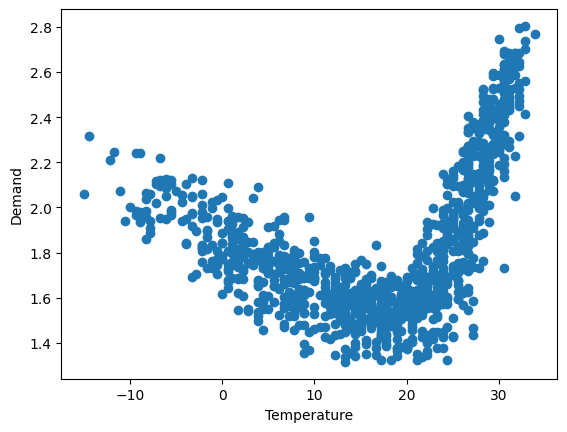

In [9]:
import warnings
warnings.filterwarnings(action='ignore')

plt.scatter(X,y)
plt.ylabel('Demand')
plt.xlabel('Temperature')

### Divide the dataset in train and test splits

In [10]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=random_state, train_size=train_size)
print('Training set and test set have {} and {} elements respectively'.format(Xtrain.shape[0], Xtest.shape[0]))

Training set and test set have 767 and 329 elements respectively


### Create an evaluation function to compute, print and return the metrics: rmse r2 f-statistic and p-value

In [15]:
from sklearn.metrics import r2_score, mean_squared_error

def evaluate_estimator(estimator, Xtrain, Xtest, ytrain, ytest):
  estimator.fit(Xtrain, ytrain)
  y_pred = estimator.predict(Xtest)

  r2 = r2_score(ytest, y_pred)
  rmse = mean_squared_error(ytest, y_pred, squared=False)

  return r2, rmse, estimator

## First experiment
Create a linear model

Train the model on X_train and y_train

Evaluate the model on X_test and y_test


In [16]:
from sklearn.linear_model import LinearRegression

r2, rmse, estimator = evaluate_estimator(LinearRegression(), Xtrain, Xtest, ytrain, ytest)
print('Linear Regression -> r2: {:.3f} RMSE: {:.3f}'.format(r2, rmse))

Linear Regression -> r2: 0.168 RMSE: 0.319


#### Visualize the prediction of the model

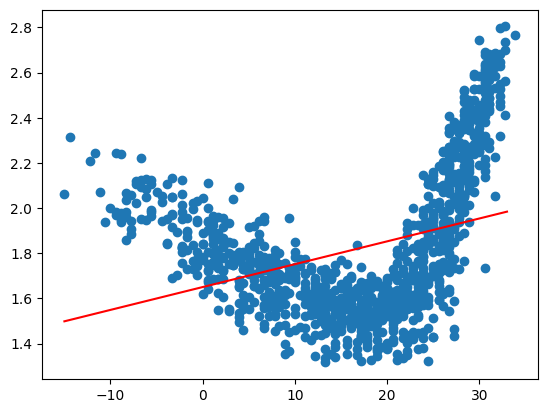

In [26]:
lr_pred = estimator.predict(np.arange(min(X.temp), max(X.temp)).reshape(-1,1))
plt.plot(np.arange(min(X['temp']), max(X['temp'])), lr_pred, color='red')
plt.scatter(X,y)

## Second experiment - Polynomial regression
We can clearly see that the linear regression model cannot really approximate the data distribution.

We can now try with a non linear regression model:
1. Use the sklearn fucntion _PolynomialFeature_ to create a new array of features. Set _degree=2_ and _include_bias=False_
2. Train a Linear regression model with the new features
3. Evaluate the model
4. Visualize the predicted values of the model

#### Polynomial degree = 2

In [51]:
from sklearn.preprocessing import PolynomialFeatures

pl = PolynomialFeatures(degree=2)
Xtrain_pf = pl.fit_transform(Xtrain)
Xtest_pf = pl.fit_transform(Xtest)

In [52]:
r2, rmse, estimator = evaluate_estimator(LinearRegression(), Xtrain_pf, Xtest_pf, ytrain, ytest)
print('Polynomial Regression (degree=2) -> r2: {:.3f} RMSE: {:.3f}'.format(r2, rmse))

Polynomial Regression (degree=2) -> r2: 0.726 RMSE: 0.183


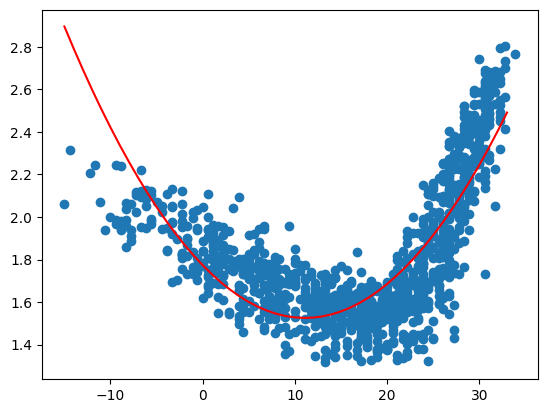

In [53]:
pr_pred = estimator.predict(pl.transform(np.arange(min(X.temp), max(X.temp)).reshape(-1,1)))
plt.plot(np.arange(min(X.temp), max(X.temp)), pr_pred, color='red')
plt.scatter(X,y)

## Third experiment

#### Polynomial degree = 3

In [56]:
pl = PolynomialFeatures(degree=3)
Xtrain_pl = pl.fit_transform(Xtrain.values)
Xtest_pl = pl.fit_transform(Xtest.values)

In [57]:
r2, rmse, estimator = evaluate_estimator(LinearRegression(), Xtrain_pl, Xtest_pl, ytrain, ytest)
print('Polynomial Regression (degree=3) -> r2: {:.3f} RMSE: {:.3f}'.format(r2, rmse))

Polynomial Regression (degree=3) -> r2: 0.822 RMSE: 0.147


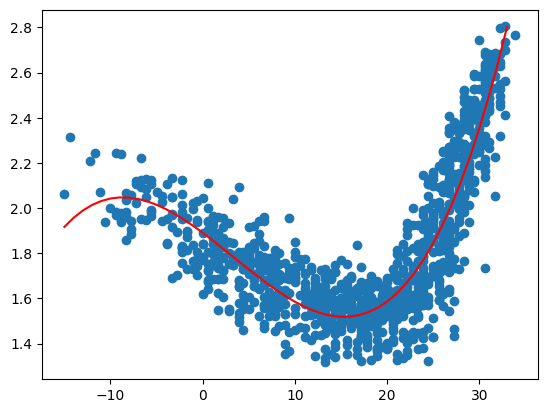

In [58]:
plt.scatter(X,y)
pl_pred = estimator.predict(pl.transform(np.arange(min(X.temp), max(X.temp)).reshape(-1,1)))
plt.plot(np.arange(min(X.temp), max(X.temp)), pl_pred, color='red')

## Fourth experiment
### Polynomial degree = 4

In [59]:
pl = PolynomialFeatures(degree=4)
Xtrain_pl = pl.fit_transform(Xtrain.values)
Xtest_pl = pl.fit_transform(Xtest.values)

In [60]:
r2, rmse, estimator = evaluate_estimator(LinearRegression(), Xtrain_pl, Xtest_pl, ytrain, ytest)
print('Polynomial Regression (degree=3) -> r2: {:.3f} RMSE: {:.3f}'.format(r2, rmse))

Polynomial Regression (degree=3) -> r2: 0.825 RMSE: 0.146


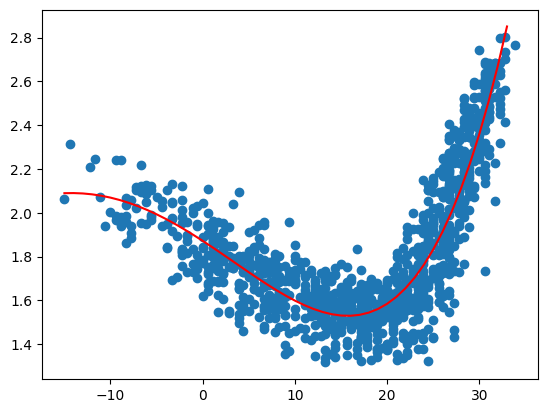

In [62]:
plt.scatter(X,y)
pl_pred = estimator.predict(pl.transform(np.arange(min(X.temp), max(X.temp)).reshape(-1,1)))
plt.plot(np.arange(min(X.temp), max(X.temp)), pl_pred, color='red')